# Airfoil experiments
All data is available in the repository

In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


# Setup

(5120, 6)
(5120, 3)


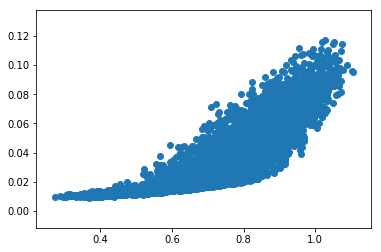

In [8]:
mc_points_preprocessed = np.loadtxt('../mc6.txt')
forces = np.loadtxt('../force_6_params_mc.dat')
mc_points = []
for f in forces[:,0]:
    for n in range(mc_points_preprocessed.shape[0]):
        if mc_points_preprocessed[n,0] == f:
            mc_points.append(mc_points_preprocessed[n,1:])
mc_points = np.array(mc_points)




input_size=6
train_size=128
validation_size=128

epochs = 500000

airfoils_network = [12, 12, 10, 12, 10, 12, 10, 10, 12,1]

print(mc_points.shape)
print(forces.shape)
plt.scatter(forces[:,1], forces[:,2])

# One network per variable

In [ ]:
force_names=['Lift', 'Drag']
batch_sizes=[train_size]
train_sizes = [16, 32, train_size]

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}

losses = ["mean_squared_error", "mean_absolute_error"]

for optimizer in optimizers.keys():
    for loss in losses:
        display(HTML("<h1>{} with {}</h1>".format(optimizer, loss)))

        for batch_size in batch_sizes:
            tables = Tables.make_default()
            
            for (n, f) in enumerate(force_names):
                seed_random_number(random_seed)
                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                         network=airfoils_network, train_size=train_size,
                                                         validation_size=validation_size,
                                                        loss=loss, 
                                                        large_integration_points=None)
                
                output_information = OutputInformation(tables=tables, title=force_names[n],
                                                      short_title=force_names[n],
                                                      sampling_method='MC')
                showAndSave.prefix='airfoil_mc_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f,batch_size, train_size)
                get_network_and_postprocess(mc_points, forces[:,n+1], network_information = network_information,
                    output_information = output_information)
            
            showAndSave.prefix='airfoil_mc_%s_%s_all_ts_%d_bs_%d' %(optimizer, loss, batch_size, train_size)
            tables.write_tables()
  

# As a function of training errors

In [ ]:
force_names=['Lift', 'Drag']
epochs = 500000

optimizers = {"SGD": keras.optimizers.SGD,
             "Adam": keras.optimizers.Adam}
loss = "mean_squared_error"
optimizer='SGD'
for n in range(len(force_names)):
    f=force_names[n]
    tables = Tables.make_default()
    def run_function(network_information, output_information):
        showAndSave.prefix='airfoil_mc_convergence_%s_%s_%s_ts_%d_bs_%d' %(optimizer, loss, f, 
                                                                        network_information.batch_size,
                                                                        network_information.train_size)
        showAndSave.silent=True
        print_comparison_table.silent = True
        get_network_and_postprocess(mc_points, forces[:,n+1], network_information = network_information,
            output_information = output_information)
        
        showAndSave.prefix='airfoil_mc_convergence_result_%s_%s_%s' %(optimizer, loss, f)
        
        
    network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                     network=airfoils_network, train_size=None,
                                                     validation_size=None,
                                                    loss=loss, 
                                                    large_integration_points=None,
                                                    tries=5)
            
    output_information = OutputInformation(tables=tables, title=force_names[n],
                                          short_title=force_names[n], sampling_method='MC')
    
    plot_train_size_convergence(network_information,
                               output_information, 
                               run_function,
                               mc_points.shape[0]
                               )

In [ ]:
print(output_information.__dict__)